# **Demo: Convolutional Neural Network using Keras**
In this demo, you will learn:
*   how to load cifar10 dataset
*   how to preprocess color images
*   how to build and train a CNN model 

We first import the related packages as usual.

In [10]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10

**Step 1. Download CIFAR10 dataset and store the class name in an array**

In [11]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Step 2. Display images in CIFAR10 dataset**

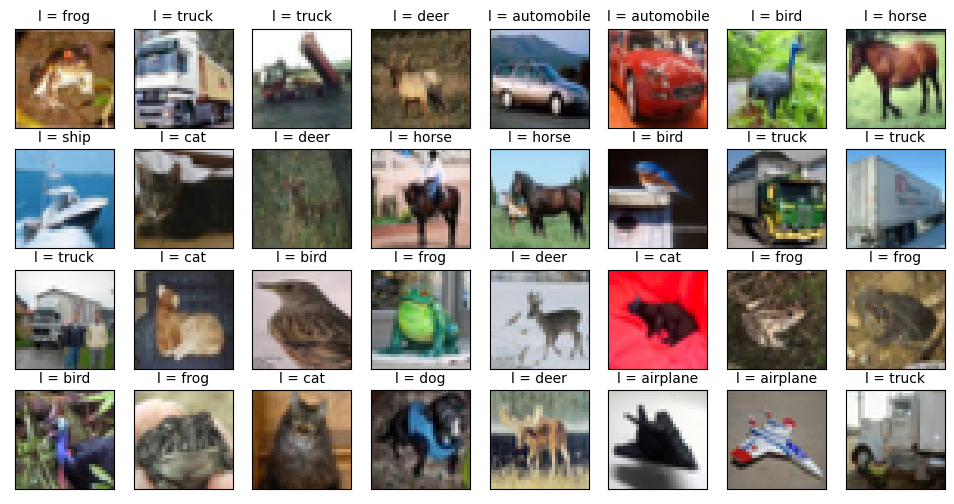

In [12]:
def plot_multiimages(images, labels, prediction, idx, num=32):
    fig, ax = plt.subplots(4, 8, figsize=(12, 6))
    if num > 32:
        num = 32
    for i in range(0, num):
        ax = plt.subplot(4, 8, 1+i)
        ax.imshow(images[idx])
        title = "l = "+class_names[int(labels[idx])]
        if len(prediction) > 0:
            title = "l = {}, p = {}".format(class_names[int(labels[idx])], class_names[prediction[idx]])
        else:
            title = "l = {}".format(class_names[int(labels[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

plot_multiimages(x_train_image, y_train_label, [], 0, 32)

**Step 3. Display the shapes of training set in CIFAR10**

A sample in CIFAR10 consists of an image and its label. The image is a gray-level image of the size 28*28. There are 60000 samples in training set.

In [13]:
print('x_train_image: ', x_train_image.shape) 

print('y_train_label: ', y_train_label.shape)


x_train_image:  (50000, 32, 32, 3)
y_train_label:  (50000, 1)


**Step 4. Image data preprocessing**
* Change the data type to be float 
* Normalize the range of digital numbers to be [0.0, 1.0] 

In [14]:
x_train = x_train_image.astype('float32')
x_test = x_test_image.astype('float32')
x_train_norm = x_train / 255
x_test_norm = x_test / 255
print(x_train_norm[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


**Step 5. Label preprocessing (one-hot-encoding)**

In [15]:
y_TrainOneHot = utils.to_categorical(y_train_label)
y_TestOneHot = utils.to_categorical(y_test_label)
print(y_TrainOneHot[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Step 6. Build a CNN model**

In [16]:
model = Sequential()

model.add(Conv2D(filters=25, kernel_size=(3, 3), padding='valid', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=50, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 25)        700       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 25)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 50)        11300     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1800)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

**Step 7. Model training**

Epoch 1/20
1250/1250 [==============================] - 26s 20ms/step - loss: 1.7612 - accuracy: 0.3377 - val_loss: 1.4011 - val_accuracy: 0.4966
Epoch 2/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.4007 - accuracy: 0.5002 - val_loss: 1.1836 - val_accuracy: 0.5800
Epoch 3/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2495 - accuracy: 0.5613 - val_loss: 1.1249 - val_accuracy: 0.6078
Epoch 4/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1510 - accuracy: 0.5972 - val_loss: 1.0621 - val_accuracy: 0.6250
Epoch 5/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.0796 - accuracy: 0.6295 - val_loss: 0.9959 - val_accuracy: 0.6555
Epoch 6/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.0235 - accuracy: 0.6485 - val_loss: 0.9497 - val_accuracy: 0.6750
Epoch 7/20
1250/1250 [==============================] - 25s 20ms/step - loss: 0.9652 - accuracy: 0.6697 - val_loss: 0.9348 -

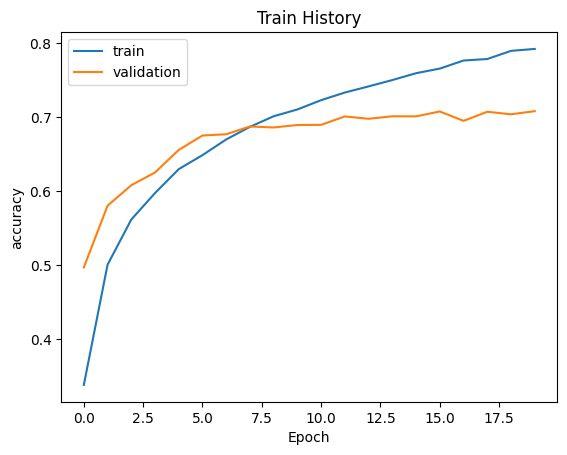

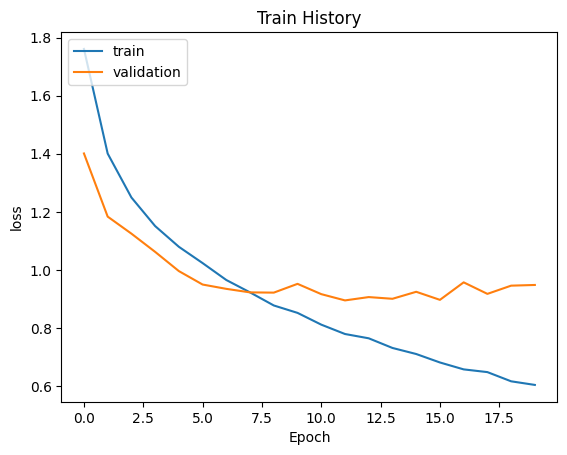

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm[0:len(x_train_image)], y=y_TrainOneHot[0:len(x_train_image)], validation_split=0.2, epochs=20, batch_size=32, verbose=1)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

Step 8. Model testing

In [18]:
scores=model.evaluate(x_test_norm[0:10000],y_TestOneHot[0:10000])
print()  
print("\t[Info] Accuracy of testing data={:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 2s 5ms/step - loss: 0.9900 - accuracy: 0.7010

	[Info] Accuracy of testing data=70.1%
